# For performing histogram matching 

The motivation for this notebook is the significantly different intensity histograms from sample to sample. This notebook solves by finding the average histogram of the training data, and then histogram matching the target dataset to this average histogram

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

FOLDERNAME = 'Lab/Grain-U-Net'
assert FOLDERNAME is not None, "[!] Enter the foldername."

import sys
sys.path.append('/content/drive/MyDrive/{}'.format(FOLDERNAME))
sys.path.append('/content/drive/MyDrive/{}/src'.format(FOLDERNAME))
%cd /content/drive/My\ Drive/$FOLDERNAME

Mounted at /content/drive
/content/drive/My Drive/Lab/Grain-U-Net


## Importing Reference


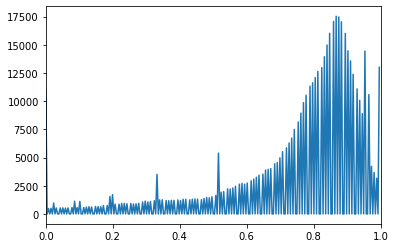

In [3]:
from pathlib import Path, PurePath
from skimage import io, exposure
import numpy as np
import matplotlib.pyplot as plt

path = Path('data/hist_analysis/Al_train_cropped.png')
reference = io.imread(path, as_gray=True)
p2, p98 = np.percentile(reference, (2, 98))
reference = exposure.rescale_intensity(reference, in_range=(p2, p98))

ref_hist, bin_edges = np.histogram(reference, bins=256, range=(0,1))
plt.figure()
plt.xlim([0.0, 1])
plt.plot(bin_edges[0:-1], ref_hist)
plt.show()

## Matching 

In [4]:
from skimage.exposure import match_histograms
import os

in_dir = Path('data/test_Al_AsDep')
out_dir = Path('data/test_Al_AsDep_contrast+histmatched')
os.mkdir(out_dir)

for dirs in in_dir.glob('*'):
    os.mkdir(out_dir / PurePath(dirs).name)
    os.mkdir(out_dir / PurePath(dirs).name / 'raw')
    for paths in (dirs / 'raw').glob('*.tif'):
        img = io.imread(paths)
        matched = match_histograms(img, reference)
        fname = out_dir / PurePath(dirs).name / 'raw' / PurePath(paths.name)
        io.imsave(fname, matched.astype('float32'))

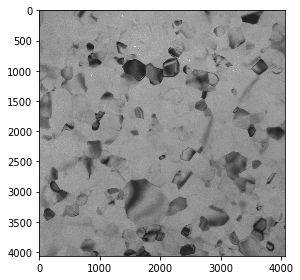

In [ ]:
img = io.imshow(io.imread('data/test_Al_AsDep_histmatched/fov3/raw/al-263-asd_30umObj_28.5kx_4sec-int_fov3_-1d.tif'))

In [ ]:
hist, bin_edges = np.histogram(img, bins=256, range=(0.0,1.0))
plt.figure()
plt.xlim([0.0, 1])
plt.plot(bin_edges[0:-1], hist)
plt.show()

TypeError: ignored